In [6]:
import re
import os
import random
os.chdir('/content/drive/MyDrive/ML/hw2')

from utils import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy
from scipy import sparse

from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

from tqdm import tqdm
from itertools import chain
from collections import Counter

import pprint as pp
pp = pp.PrettyPrinter(indent=4)

In [2]:
data = load_data(merge=True)
target = data.label

print(f'No. of total samples: {len(data)}')

No. of total samples: 1320122


In [ ]:
trainSize = [.4, .5, .6, .7]
seeds = [64, 128, 264]

uni_tf_train = []
uni_tf_test = []
uni_tfidf_train = []
uni_tfidf_test = []

for size in trainSize:
    print(f'\n\nProcessing for train size: {size*100}%')

    uni_tf_train_curr = []
    uni_tf_test_curr = []
    uni_tfidf_train_curr = []
    uni_tfidf_test_curr = []

    for seed in seeds:
        train, test, _, _ = train_test_split(data, target, test_size=1-size, shuffle=True, stratify=target, random_state=seed)

        unigram_model = UnigramModel()
        unigram_model.build_vocab(data=train, unigram_threshold=3000)
        train_uni_tf, idf = unigram_model.tf(data=train, type='train')
        test_uni_tf = unigram_model.tf(data=test, type='test')

        clf_uni_tf = Perceptron(unigram_model.unigram_vocab_size)
        clf_uni_tf.fit(train.label.tolist(), train_uni_tf)

        uni_tf_train_curr.append(clf_uni_tf.evaluate(train.label.tolist(), train_uni_tf))
        uni_tf_test_curr.append(clf_uni_tf.evaluate(test.label.tolist(), test_uni_tf))

        train_uni_tfidf = unigram_model.tfidf(data=train, term_frequency_mat=train_uni_tf, idf_mat=idf)
        test_uni_tfidf = unigram_model.tfidf(data=test, term_frequency_mat=test_uni_tf, idf_mat=idf)

        clf_uni_tfidf = Perceptron(unigram_model.unigram_vocab_size)
        clf_uni_tfidf.fit(train.label.tolist(), train_uni_tfidf)

        uni_tfidf_train_curr.append(clf_uni_tfidf.evaluate(train.label.tolist(), train_uni_tfidf))
        uni_tfidf_test_curr.append(clf_uni_tfidf.evaluate(test.label.tolist(), test_uni_tfidf))

    uni_tf_train_curr = np.mean(np.array(uni_tf_train_curr), axis=0).tolist()
    uni_tf_test_curr = np.mean(np.array(uni_tf_test_curr), axis=0).tolist()
    uni_tfidf_train_curr = np.mean(np.array(uni_tfidf_train_curr), axis=0).tolist()
    uni_tfidf_test_curr = np.mean(np.array(uni_tfidf_test_curr), axis=0).tolist()

    uni_tf_train.append(uni_tf_train_curr)
    uni_tf_test.append(uni_tf_test_curr)
    uni_tfidf_train.append(uni_tfidf_train_curr)
    uni_tfidf_test.append(uni_tfidf_test_curr)



Processing for train size: 40.0%


Processing for train size: 50.0%


Processing for train size: 60.0%


Processing for train size: 70.0%


In [3]:
trainSize = [.4, .5, .6, .7]
seeds = [64, 128, 264]

unibi_tf_train = []
unibi_tf_test = []
unibi_tfidf_train = []
unibi_tfidf_test = []

for size in trainSize:
    print(f'\n\nProcessing for train size: {size*100}%')

    unibi_tf_train_curr = []
    unibi_tf_test_curr = []
    unibi_tfidf_train_curr = []
    unibi_tfidf_test_curr = []

    for seed in seeds:
        train, test, _, _ = train_test_split(data, target, test_size=1-size, shuffle=True, stratify=target, random_state=seed)

        bigram_model = BigramModel()
        bigram_model.build_vocab(data=train, unigram_threshold=3000, bigram_threshold=3000)
        train_unibi_tf, idf = bigram_model.tf(data=train, type='train')
        test_unibi_tf = bigram_model.tf(data=test, type='test')

        clf_unibi_tf = Perceptron(bigram_model.unigram_bigram_vocab_size)
        clf_unibi_tf.fit(train.label.tolist(), train_unibi_tf)

        unibi_tf_train_curr.append(clf_unibi_tf.evaluate(train.label.tolist(), train_unibi_tf))
        unibi_tf_test_curr.append(clf_unibi_tf.evaluate(test.label.tolist(), test_unibi_tf))

        train_unibi_tfidf = bigram_model.tfidf(data=train, term_frequency_mat=train_unibi_tf, idf_mat=idf)
        test_unibi_tfidf = bigram_model.tfidf(data=test, term_frequency_mat=test_unibi_tf, idf_mat=idf)

        clf_unibi_tfidf = Perceptron(bigram_model.unigram_bigram_vocab_size)
        clf_unibi_tfidf.fit(train.label.tolist(), train_unibi_tfidf)

        unibi_tfidf_train_curr.append(clf_unibi_tfidf.evaluate(train.label.tolist(), train_unibi_tfidf))
        unibi_tfidf_test_curr.append(clf_unibi_tfidf.evaluate(test.label.tolist(), test_unibi_tfidf))

    unibi_tf_train_curr = np.mean(np.array(unibi_tf_train_curr), axis=0).tolist()
    unibi_tf_test_curr = np.mean(np.array(unibi_tf_test_curr), axis=0).tolist()
    unibi_tfidf_train_curr = np.mean(np.array(unibi_tfidf_train_curr), axis=0).tolist()
    unibi_tfidf_test_curr = np.mean(np.array(unibi_tfidf_test_curr), axis=0).tolist()

    unibi_tf_train.append(unibi_tf_train_curr)
    unibi_tf_test.append(unibi_tf_test_curr)
    unibi_tfidf_train.append(unibi_tfidf_train_curr)
    unibi_tfidf_test.append(unibi_tfidf_test_curr)



Processing for train size: 40.0%


Processing for train size: 50.0%


Processing for train size: 60.0%


Processing for train size: 70.0%


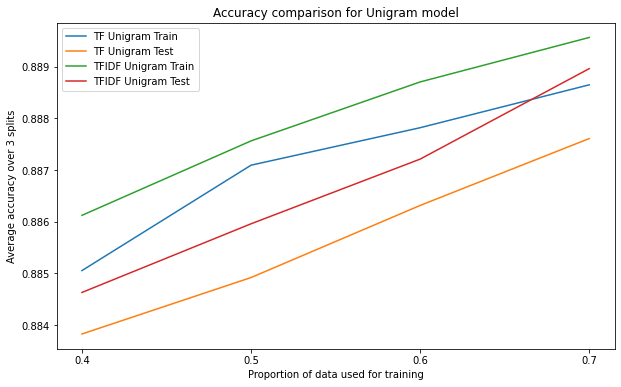

In [23]:
plt.figure(figsize=(10,6))

plt.plot(trainSize, np.array(uni_tf_train).T[0], label='TF Unigram Train')
plt.plot(trainSize, np.array(uni_tf_test).T[0], label='TF Unigram Test')
plt.plot(trainSize, np.array(uni_tfidf_train).T[0], label='TFIDF Unigram Train')
plt.plot(trainSize, np.array(uni_tfidf_test).T[0], label='TFIDF Unigram Test')

plt.xlabel('Proportion of data used for training')
plt.ylabel('Average accuracy over 3 splits')
plt.title('Accuracy comparison for Unigram model')
plt.xticks(trainSize)
plt.legend()
plt.savefig('unigram.png');

We can see that TFIDF Unigram performed better than TF Unigram model.

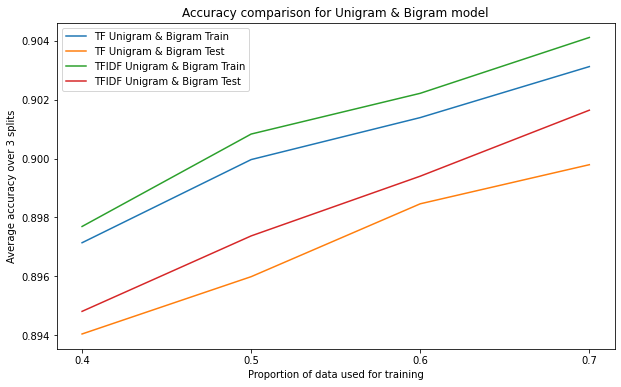

In [25]:
plt.figure(figsize=(10,6))

plt.plot(trainSize, np.array(unibi_tf_train).T[0], label='TF Unigram & Bigram Train')
plt.plot(trainSize, np.array(unibi_tf_test).T[0], label='TF Unigram & Bigram Test')
plt.plot(trainSize, np.array(unibi_tfidf_train).T[0], label='TFIDF Unigram & Bigram Train')
plt.plot(trainSize, np.array(unibi_tfidf_test).T[0], label='TFIDF Unigram & Bigram Test')

plt.xlabel('Proportion of data used for training')
plt.ylabel('Average accuracy over 3 splits')
plt.title('Accuracy comparison for Unigram & Bigram model')
plt.xticks(trainSize)
plt.legend()
plt.savefig('unigram_and_bigram.png');

We can again see that TFIDF Unigram & Bigram model out-performs TF Unigram & Bigram model

We know compare TFIDF Unigram vs TFIDF Unigram and Bigram

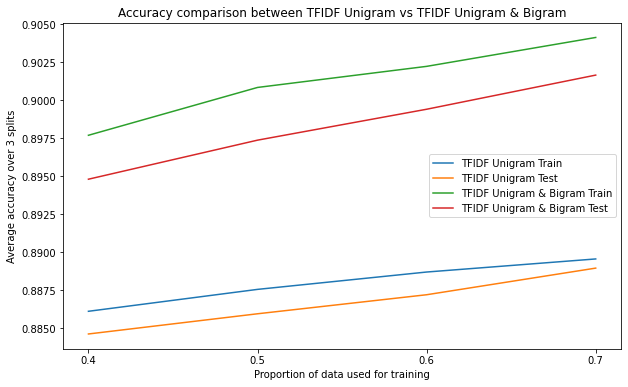

In [28]:
plt.figure(figsize=(10,6))

plt.plot(trainSize, np.array(uni_tfidf_train).T[0], label='TFIDF Unigram Train')
plt.plot(trainSize, np.array(uni_tfidf_test).T[0], label='TFIDF Unigram Test')
plt.plot(trainSize, np.array(unibi_tfidf_train).T[0], label='TFIDF Unigram & Bigram Train')
plt.plot(trainSize, np.array(unibi_tfidf_test).T[0], label='TFIDF Unigram & Bigram Test')

plt.xlabel('Proportion of data used for training')
plt.ylabel('Average accuracy over 3 splits')
plt.title('Accuracy comparison between TFIDF Unigram vs TFIDF Unigram & Bigram')
plt.xticks(trainSize)
plt.legend()
plt.savefig('comparison.png');

We can see that TFIDF Unigram wins for accuracy.

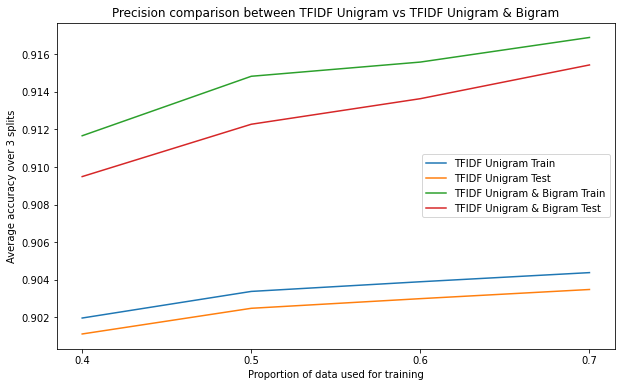

In [30]:
plt.figure(figsize=(10,6))

plt.plot(trainSize, np.array(uni_tfidf_train).T[1], label='TFIDF Unigram Train')
plt.plot(trainSize, np.array(uni_tfidf_test).T[1], label='TFIDF Unigram Test')
plt.plot(trainSize, np.array(unibi_tfidf_train).T[1], label='TFIDF Unigram & Bigram Train')
plt.plot(trainSize, np.array(unibi_tfidf_test).T[1], label='TFIDF Unigram & Bigram Test')

plt.xlabel('Proportion of data used for training')
plt.ylabel('Average accuracy over 3 splits')
plt.title('Precision comparison between TFIDF Unigram vs TFIDF Unigram & Bigram')
plt.xticks(trainSize)
plt.legend()
plt.savefig('precision.png');

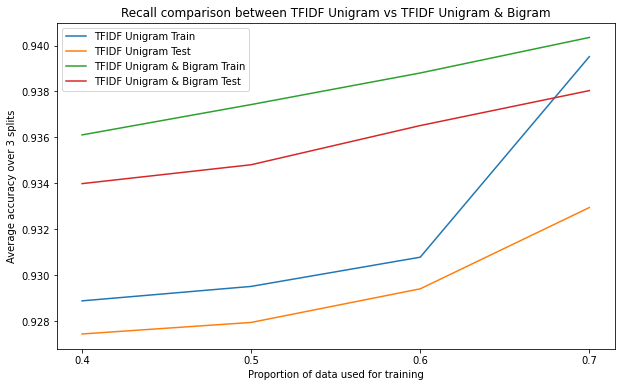

In [31]:
plt.figure(figsize=(10,6))

plt.plot(trainSize, np.array(uni_tfidf_train).T[2], label='TFIDF Unigram Train')
plt.plot(trainSize, np.array(uni_tfidf_test).T[2], label='TFIDF Unigram Test')
plt.plot(trainSize, np.array(unibi_tfidf_train).T[2], label='TFIDF Unigram & Bigram Train')
plt.plot(trainSize, np.array(unibi_tfidf_test).T[2], label='TFIDF Unigram & Bigram Test')

plt.xlabel('Proportion of data used for training')
plt.ylabel('Average accuracy over 3 splits')
plt.title('Recall comparison between TFIDF Unigram vs TFIDF Unigram & Bigram')
plt.xticks(trainSize)
plt.legend()
plt.savefig('recall.png');

We conclude that Term-frequency Inverse-document-frequency with unigrams and bigrams is our best model.